In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


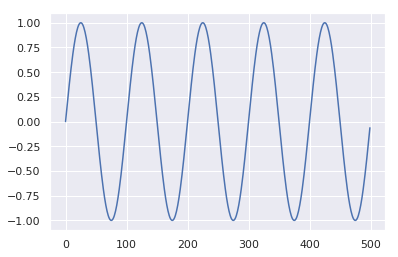

In [2]:
t = np.arange(0, 50, 0.1)
x = np.sin(np.pi/5*t)
plt.plot(x)
plt.show()

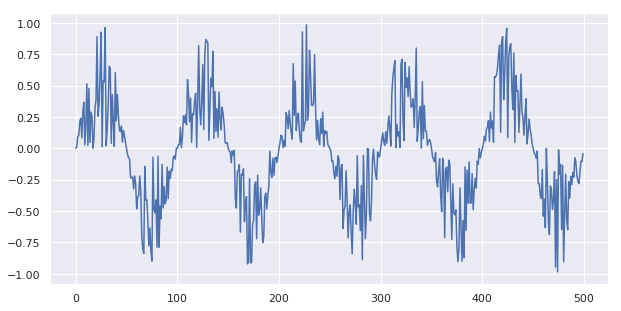

In [3]:
plt.figure(figsize=(10,5))
noise_sin = x * np.random.rand(x.shape[0])
plt.plot(noise_sin)
plt.show()

In [4]:
kernel = np.ones((5)) / 5
kernel

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [5]:
filter_size = kernel.shape[0]
noise_sin = noise_sin.reshape((-1,1))
print(noise_sin.shape)

def pad(x,padding='same'):
    if padding == 'same':
        pad_h_min = int(np.floor((filter_size - 1)/2))
        pad_h_max = int(np.ceil((filter_size - 1)/2))
        pad_h = (pad_h_min, pad_h_max)
        print(pad_h)
        return np.pad(x, (pad_h, (0, 0)), mode='constant')
    else:
        return x

(500, 1)


In [6]:
noise_sin_pad = pad(noise_sin)

(2, 2)


In [7]:
kernel = kernel.reshape((-1,1))

In [8]:
output_conv = np.zeros(noise_sin.shape)
filter_size = 5
stride = 1
t_range = int((noise_sin_pad.shape[0] - filter_size) / stride + 1)
print(t_range)
for i in range(t_range):
    sum_val = np.sum(noise_sin_pad[i * stride:i * stride + filter_size, :] * kernel)
    output_conv[i, :] = sum_val

500


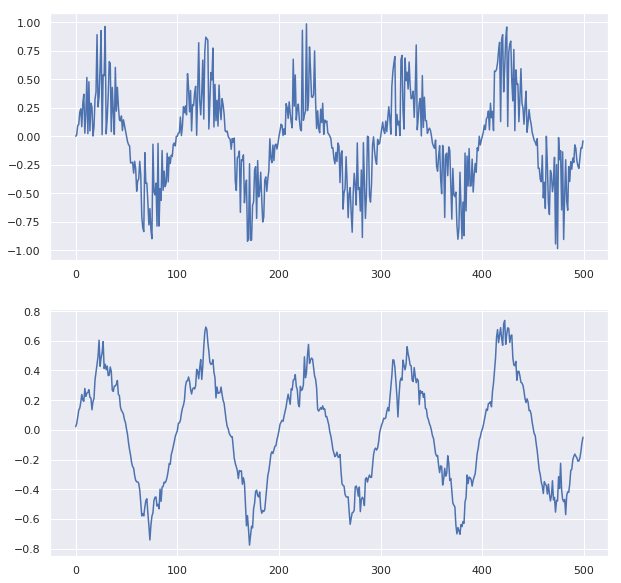

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(noise_sin)
plt.subplot(2,1,2)
plt.plot(output_conv[:,0])
plt.show()

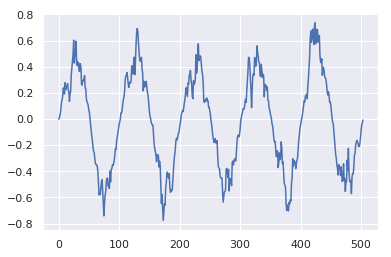

In [12]:
plt.plot(np.convolve(noise_sin_pad[:,0], kernel[:,0],mode='same'))
plt.show()